In [1]:
#importing the library
import operator
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#read the dataset
train_set = pd.read_csv('el4233-2018-2019-02-01-training.csv', header=None)
X = train_set.iloc[:, 0].values
y = train_set.iloc[:, 1].values

X = X[:, np.newaxis]
y = y[:, np.newaxis]

#split the training set
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# train_x = sc_X.fit_transform(train_x)
# valid_x = sc_X.transform(valid_x)

In [3]:
#read the test set
test_set = pd.read_csv('el4233-2018-2019-02-01-test.csv',header=None)
test_x = test_set.iloc[:, 1].values
test_x = test_x[:, np.newaxis]
# valid_y = valid_set.iloc[:, 1].values

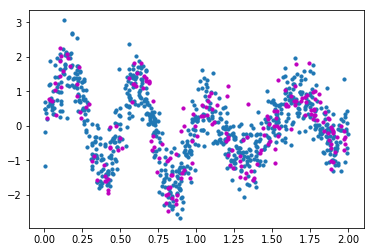

In [4]:
plt.scatter(train_x, train_y, s=10)
plt.scatter(valid_x, valid_y, s=10, color='m')
plt.show()

In [5]:
report_train_rmse=np.zeros(50)
report_valid_rmse=np.zeros(50)

0.9978181468606533
0.02755210862584956


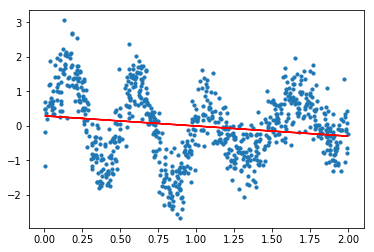

In [6]:
#linear regression

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)
y_pred = lin_reg.predict(train_x)

# compute rmse & r2
rmse = np.sqrt(mean_squared_error(train_y,y_pred))
r2 = r2_score(train_y,y_pred)
print(rmse)
print(r2)

# plot prediction
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_pred, color='red')
plt.show()

0.495249848274932
0.7604411358241745


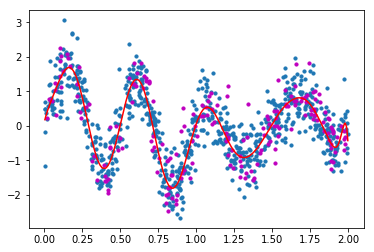

In [7]:
#polynomial_reg

poly_feat = PolynomialFeatures(degree=31)
x_poly = poly_feat.fit_transform(train_x)

lin_reg.fit(x_poly, train_y)
y_poly_pred = lin_reg.predict(x_poly)
y_poly_pred.shape

# compute rmse & r2
rmse = np.sqrt(mean_squared_error(train_y,y_poly_pred))
r2 = r2_score(train_y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(train_x, train_y, s=10)
plt.scatter(valid_x, valid_y, s=10, color='m')

# sort axis
sort_x = train_x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(sort_x,y_poly_pred), key=sort_axis)
sort_x, y_poly_pred = zip(*sorted_zip)

# plot prediction
plt.plot(sort_x, y_poly_pred, color='r')
plt.show()

In [8]:
#compute training set MSE
train_mse = mean_squared_error(train_y,y_poly_pred)
print(train_mse)

#compute validation set MSE
valid_x_poly = poly_feat.fit_transform(valid_x)
valid_y_pred = lin_reg.predict(valid_x_poly)
valid_mse = mean_squared_error(valid_y,valid_y_pred)

1.7662475051740432


In [9]:
# report_train_mse[49] = train_mse
# report_valid_mse[49] = valid_mse

In [10]:
import collections
Astveb = collections.namedtuple('Astveb', ['tr', 'ts'])

def create_polynomial_regresion_model(degree):
    #polynomial_reg
    poly_feat = PolynomialFeatures(degree=degree)
    x_poly = poly_feat.fit_transform(train_x)

    lin_reg.fit(x_poly, train_y)
    y_poly_pred = lin_reg.predict(x_poly)
    y_poly_pred.shape

    # compute rmse & r2
    train_rmse = np.sqrt(mean_squared_error(train_y,y_poly_pred))
#     print(rmse)
    
    #compute validation set MSE
    valid_x_poly = poly_feat.fit_transform(valid_x)
    valid_y_pred = lin_reg.predict(valid_x_poly)
    valid_rmse = np.sqrt(mean_squared_error(valid_y,valid_y_pred))
    
    return Astveb(tr = train_rmse,  ts = valid_rmse)


In [24]:
for i in range(len(report_train_rmse)):
    temp = create_polynomial_regresion_model(i)
    print(i, temp)
    report_train_rmse[i] = temp.tr
    report_valid_rmse[i] = temp.ts
# create_polynomial_regresion_model(1)

0 Astveb(tr=1.0118548752522591, ts=1.0457975134418869)
1 Astveb(tr=0.9978181468606533, ts=1.0441580228316978)
2 Astveb(tr=0.9403934437698972, ts=0.9791919890284048)
3 Astveb(tr=0.925881587940465, ts=0.9515772643558695)
4 Astveb(tr=0.9096058343137995, ts=0.9375553154827547)
5 Astveb(tr=0.9025161441982379, ts=0.9263493243116303)
6 Astveb(tr=0.9016179858044018, ts=0.9235233278952263)
7 Astveb(tr=0.8720723779774759, ts=0.9076805749703556)
8 Astveb(tr=0.8658879672842065, ts=0.9036064955340438)
9 Astveb(tr=0.8016198245658768, ts=0.8140052067325871)
10 Astveb(tr=0.7963275095934949, ts=0.811458475363616)
11 Astveb(tr=0.6405387024839776, ts=0.6583544783107336)
12 Astveb(tr=0.6189806180449723, ts=0.6261077332783258)
13 Astveb(tr=0.566501618628264, ts=0.5827395115240346)
14 Astveb(tr=0.5109856428141459, ts=0.5413482012845385)
15 Astveb(tr=0.5064352366807042, ts=0.539182443768683)
16 Astveb(tr=0.4998911383604346, ts=0.5247016020097159)
17 Astveb(tr=0.49979745304074813, ts=0.5250016959549965)
18 As

In [12]:
print(np.argmin(report_train_rmse))
print(np.argmin(report_valid_rmse))

26
31


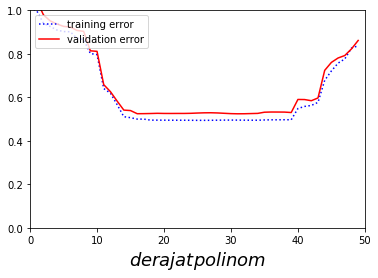

In [13]:
plt.plot(report_train_rmse, "b:",label='training error')

plt.plot(report_valid_rmse, "r-",label='validation error') 
# training set
plt.axis([0, 50, 0, 1])
# plt.axis([20, 35, 0.45, 0.8])
plt.legend(loc='upper left')
# save_fig("simple_sin_error")
plt.xlabel("$derajat polinom$", fontsize=18)
plt.show()

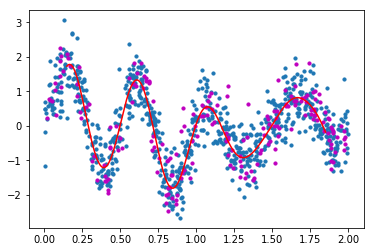

In [25]:
# poly_feat = PolynomialFeatures(degree=33)
# test_x_poly = poly_feat.fit_transform(test_x)
# test_y_pred = lin_reg.predict(test_x_poly)

# print(test_x_poly)

#polynomial_reg
poly_feat = PolynomialFeatures(degree=23)
x_poly = poly_feat.fit_transform(train_x)

lin_reg.fit(x_poly, train_y)
y_poly_pred = lin_reg.predict(x_poly)
y_poly_pred.shape

#compute validation set MSE
test_x_poly = poly_feat.fit_transform(test_x)
test_y_pred = lin_reg.predict(test_x_poly)

# valid_rmse = np.sqrt(mean_squared_error(valid_y,valid_y_pred))

# result = pd.DataFrame({test_set, test_y_pred})

# print(result)


plt.scatter(train_x, train_y, s=10)
plt.scatter(valid_x, valid_y, s=10, color='m')

# sort axis
sort_x = test_x
y_temp = test_y_pred
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(sort_x, y_temp), key=sort_axis)
sort_x, y_temp = zip(*sorted_zip)

# plot prediction
plt.plot(sort_x, y_temp, color='r')
plt.show()

In [26]:
temp = pd.DataFrame(test_y_pred)

result = pd.concat([test_set, temp], axis = 1)

In [27]:
result.to_csv('el4233-2018-2019-02-01-solution-18216002.csv', header=False, index=False)